In [49]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import scipy
from scipy.spatial import HalfspaceIntersection
from scipy.spatial import ConvexHull

from scipy.stats import truncnorm

import arviz

from DikinSamplers import RandomWalk, Langevin, DikinLangevin

import sklearn

In [114]:
NUM_TRIALS = 200

In [115]:
tol = 1e-3

In [118]:
dikinlangevin_results = [np.load(f"new_multimodal_results/dikinlangevin_trial_{i}.npy")[:, :, None] 
                         for i in range(NUM_TRIALS)]
dikinlangevin_results = np.concatenate(dikinlangevin_results, axis=-1).transpose(2, 0, 1)

In [119]:
dikinlangevin_num_transitions = []
dikinlangevin_positive_well = []
for i in range(NUM_TRIALS):
    history = dikinlangevin_results[i, :, :]
    
    all_positive = (history > tol).all(axis=-1).astype(int)
    all_negative = (history < -tol).all(axis=-1).astype(int)
    
    labels = all_positive - all_negative
    switches = labels[labels != 0]
    num_switches = np.sum(switches[1:] != switches[:-1])
    dikinlangevin_num_transitions.append(num_switches)
    dikinlangevin_positive_well.append((switches > 0).mean())
    
np.mean(dikinlangevin_num_transitions)

np.float64(1.43)

In [120]:
np.median(dikinlangevin_positive_well)

np.float64(0.5094586634959181)

In [121]:
np.savetxt("dikinlangevin_num_transitions.csv", dikinlangevin_num_transitions, delimiter=",")

In [122]:
np.median(dikinlangevin_num_transitions)

np.float64(1.0)

In [123]:
randomwalk_results = [np.load(f"new_multimodal_results/randomwalk_trial_{i}.npy")[:, :, None] 
                         for i in range(NUM_TRIALS)]
randomwalk_results = np.concatenate(randomwalk_results, axis=-1).transpose(2, 0, 1)

In [124]:
randomwalk_num_transitions = []
randomwalk_positive_well = []
for i in range(NUM_TRIALS):
    history = randomwalk_results[i, :, :]
    
    all_positive = (history > tol).all(axis=-1).astype(int)
    all_negative = (history < -tol).all(axis=-1).astype(int)
    
    labels = all_positive - all_negative
    switches = labels[labels != 0]
    num_switches = np.sum(switches[1:] != switches[:-1])
    
    randomwalk_num_transitions.append(num_switches)
    randomwalk_positive_well.append((switches > 0).mean())
    
np.mean(randomwalk_num_transitions)

np.float64(1.065)

In [125]:
np.median(randomwalk_positive_well)

np.float64(0.5183187577342612)

In [126]:
np.savetxt("randomwalk_num_transitions.csv", randomwalk_num_transitions, delimiter=",")

In [127]:
np.median(randomwalk_num_transitions)

np.float64(1.0)

In [128]:
max(randomwalk_num_transitions)

np.int64(6)

In [129]:
max(dikinlangevin_num_transitions)

np.int64(7)

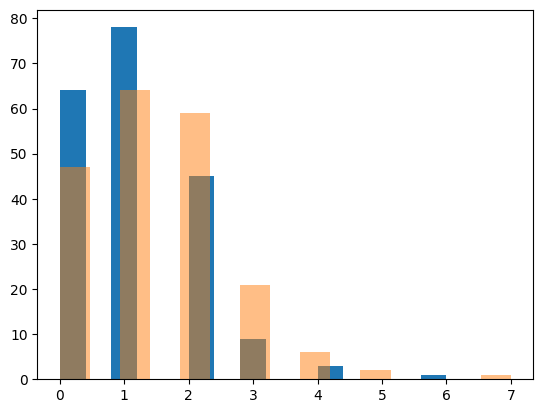

In [130]:
plt.hist(randomwalk_num_transitions, bins=15);
plt.hist(dikinlangevin_num_transitions, alpha=0.5, bins=15);

In [131]:
(np.array(dikinlangevin_num_transitions) == 0).mean()

np.float64(0.235)

In [132]:
(np.array(randomwalk_num_transitions) == 0).mean()

np.float64(0.32)